# Linear Regression

## Import and Read data

#### Necessary Imports

In [ ]:
import numpy as np
import pandas as pd
from helper import plot_mse
import matplotlib.pyplot as plt

#### Reading Data and General Statistics

In [ ]:
data = pd.read_csv('house_price.csv')
# data.head()
X = data['GrLivArea']
y = data['SalePrice']

num_element = X.shape[0]
print("Shape of X", X.shape)
print("Shape of y", y.shape)
print("Number of element", num_element)

In [ ]:
num_samples = X.shape[0]
bias = np.zeros(num_samples)

X = (X - X.mean()) / X.std()
X = np.column_stack((bias, X))
_, num_features = X.shape

print("Number of Samples", num_samples)
print("Number of Features", num_features)
print("Design Matrix Shape", X.shape)
assert X.shape[1] == 2, "restart the notebook"

## Helper Functions

#### Predict

In [ ]:
W = np.zeros(num_features)
print("Shape of design matrix", X.shape)
print("Shape of Weight", W.shape)
assert X.shape[-1] == W.shape[0], 'Matrix incompatible'

In [ ]:
y_pred = X @ W
print("Shape of Predictions", y_pred.shape)

In [ ]:
def predict(X, W):
    assert X.shape[-1] == W.shape[0], 'Matrix incompatible'
    return X @ W

y_pred = predict(X, W)
print(y_pred.shape)

#### Loss Function Intution


In [ ]:
# Discuss about the loss function scenario
plot_mse(num=50)

#### Mean Squared Error (MSE) Cost Function

The MSE is defined as:

$$MSE = J(W) =  \frac{1}{2m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)})^2$$

where

$$h_w(x) = w^Tx$$

The MSE measures how much the average model predictions vary from the correct values. The number is higher when the model is performing "bad" on the training set.


In [ ]:
def mse(y_true, y_pred):
    square_error = (y_pred - y_true) ** 2
    return np.mean(square_error)


#### Gradient 
The gradient of MSE/J(W) is given by:


$$MSE' = J'(W) = \frac{1}{m} \sum_{i=1}^{m} (h_w(x^{(i)}) - y^{(i)}) * x^{(i)}$$

In [ ]:
(y_pred-y).shape
((y_pred-y).T @ X).shape

In [ ]:
def gradient_step(X, W, y, lr):
    y_pred = predict(X, W)
    grad_w = (y-y_pred).T @ X
    W -= lr * grad_w   
    return W

## TRAINING

In [1]:
import numpy as np
import pandas as pd
from helper import plot_mse
import matplotlib.pyplot as plt
from dataloader import load_advanced_house_data, load_simple_house_data, split_data

X, y = load_advanced_house_data(isStd=True)
print("Shape of X", X.shape)
print("Shape of y", y.shape)

X_train, y_train, X_test, y_test = split_data(X, y, 0.8)

num_samples = X_train.shape[0]
bias = np.zeros(num_samples)
_, num_features = X_train.shape

print("Number of Samples", num_samples)
print("Number of Features", num_features)
# assert X.shape[1] == 2, "restart the notebook"

W1 = np.zeros(num_features)
W2 = np.zeros(num_features)

print("Shape of design matrix", X_train.shape)
print("Shape of Weight1", W1.shape)
print("Shape of Weight2", W2.shape)

assert X_train.shape[-1] == W1.shape[0], 'Matrix incompatible'

Shape of X (1460, 3)
Shape of y (1460,)
Number of Samples 1168
Number of Features 3
Shape of design matrix (1168, 3)
Shape of Weight1 (3,)
Shape of Weight2 (3,)


In [2]:
def mse(y_true, y_pred):
    N = len(y_true)
    square_error = ((y_pred - y_true).T @ (y_pred - y_true)) * (1.0/(2*N))
    return square_error

def predict(X, W):
    assert X.shape[-1] == W.shape[0], 'Matrix incompatible'
    return X @ W

def gradient_step(X, W, y, lr, regularize=False):
    y_pred = predict(X, W)
    grad_w = ((y_pred-y).T @ X)/len(X)
    if regularize:
        l2 = 0.1
    else: l2 = 0
    
    W -= lr * (grad_w + l2 * 2 * np.sum(W))
    return W

def regularized_mse(y_true, y_pred, W, l2=0.01):
    N = len(y_true)
    square_error = ((y_pred - y_true).T @ (y_pred - y_true)) * (1.0/(2*N))
    l2_error = l2 * W.T @ W
    return square_error + l2_error

    


In [3]:
num_iter = 2000
learning_rate = 0.01
loss_history_un_regularise = []
loss_history_regularized = []

# fit function
for iter in range(num_iter):
    y_pred = X_train @ W1
    loss = mse(y_train, y_pred)
    loss_history_un_regularise.append(loss)
    W1 = gradient_step(X_train, W1, y_train, learning_rate, regularize=False)
    

# fit function
for iter in range(num_iter):
    y_pred = X_train @ W2
    loss = regularized_mse(y_train, y_pred, W2)
    loss2 = mse(y_train, y_pred)
    loss_history_regularized.append(loss2)
    W2 = gradient_step(X_train, W2, y_train, learning_rate, regularize=True)


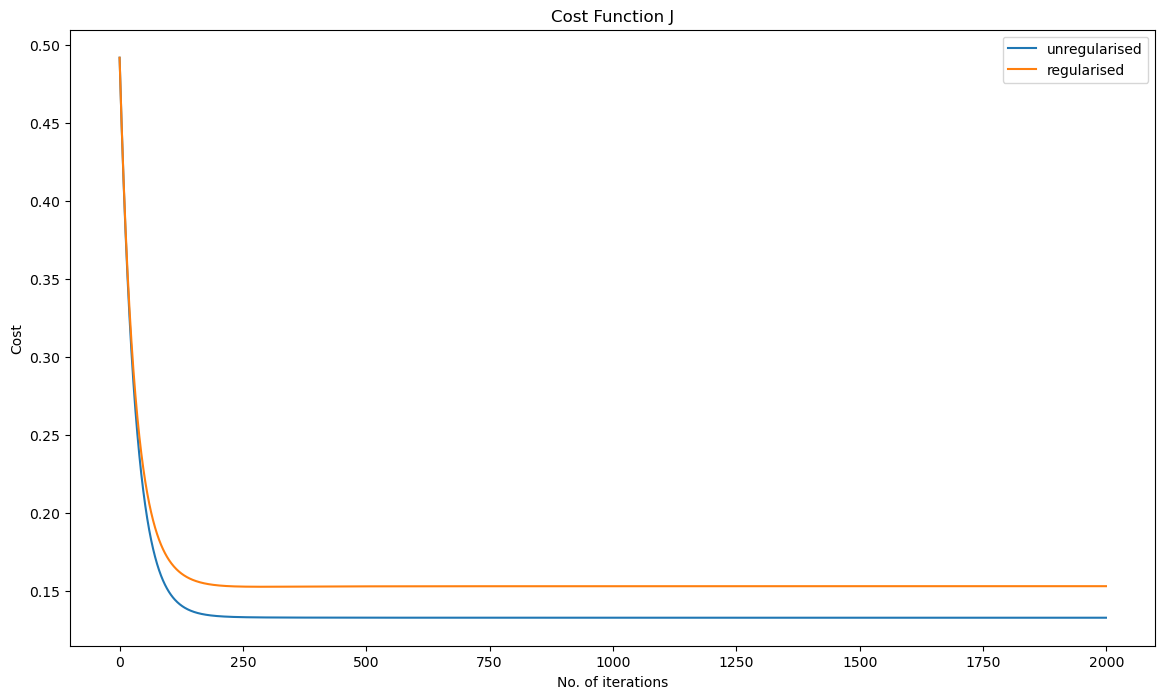

In [4]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(loss_history_un_regularise, label="unregularised")
plt.plot(loss_history_regularized, label="regularised")
plt.legend()
plt.show()

In [5]:
W1

array([0.00554321, 0.55165436, 0.40789856])

In [6]:
W2

array([-0.12844044,  0.47686856,  0.30940711])

In [7]:
def mae(y_pred, y_true):
    return np.mean(abs(y_pred - y_true))

y_pred = X_test @ W1
print(mae(y_pred=y_pred, y_true=y_test))

0.3885444060360256


In [8]:
y_pred = X_test @ W2
print(mae(y_pred=y_pred, y_true=y_test))

0.386216092666989
